##### import cv2
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from skimage import filters, feature, img_as_float, measure, morphology

In [29]:
import cv2
import numpy as np 
import os 
import math 
import matplotlib.pyplot as plt 
from skimage import filters, feature, img_as_float, measure, morphology
## 定义路径
# 将path定义为图片文件夹的路径
path = r'C:\Users\Kfor\Desktop\亚太\2019 APMCM Problems\2019 APMCM Problems\BinaryResultFilled'
os.chdir(path)

380.0 544.0


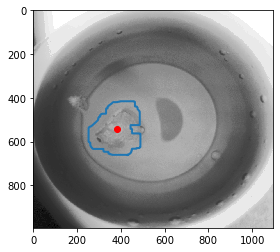

In [30]:
oneImage = '0503.bmp'

image = cv2.imread(oneImage,0)
imageOrigin = cv2.imread('../Antij_source_result/'+oneImage,0)


tmp = np.ndarray(shape=np.shape(imageOrigin))
tmp[270:750,130:600] = image

contours =  measure.find_contours(tmp,0.5)

for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

target_mat = tmp
x_index = np.repeat(np.expand_dims(range(tmp.shape[1]),axis=0),tmp.shape[0], axis=0)
y_index = np.repeat(np.expand_dims(range(tmp.shape[0]),axis=1),tmp.shape[1], axis=1)
centroid_x = round(np.sum(x_index * target_mat)/np.sum(target_mat))
centroid_y = round(np.sum(y_index * target_mat)/np.sum(target_mat))
print(centroid_x,centroid_y)

plt.imshow(imageOrigin,cmap=plt.cm.gray)
plt.scatter(centroid_x,centroid_y,color='red')


def calCenter(mat):
    target_mat = mat
    x_index = np.repeat(np.expand_dims(range(mat.shape[1]),axis=0),mat.shape[0], axis=0)
    y_index = np.repeat(np.expand_dims(range(mat.shape[0]),axis=1),mat.shape[1], axis=1)
    centroid_x = round(np.sum(x_index * target_mat)/np.sum(target_mat))
    centroid_y = round(np.sum(y_index * target_mat)/np.sum(target_mat))
    print(centroid_x,centroid_y)
    return centroid_x,centroid_y

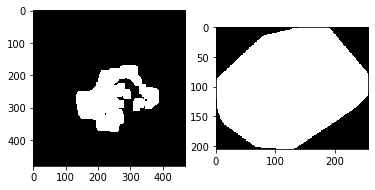

In [13]:
# oneImage = '0502.bmp'

# image = cv2.imread('../BinaryResult/'+oneImage,0)
# imageOrigin = cv2.imread('../Antij_source_result/'+oneImage,0)

# tmp = np.zeros(shape=np.shape(image),dtype=np.int)
# tmp[image==255] = 1

# prop = measure.regionprops(tmp)
# new = prop[0].convex_image

# plt.subplot(1,2,1)
# plt.imshow(image,cmap=plt.cm.gray)
# plt.subplot(1,2,2)
# plt.imshow(new,cmap=plt.cm.gray)


In [6]:
try:
    os.makedirs('../BinaryResultBack')
    os.makedirs('../Centroid')
except:
    pass

399.0 524.0
404.0 531.0
402.0 548.0
402.0 550.0
396.0 550.0
385.0 540.0
380.0 544.0
392.0 537.0
390.0 538.0
389.0 537.0
388.0 545.0
390.0 536.0
383.0 533.0
371.0 538.0
369.0 541.0
396.0 531.0
368.0 539.0
372.0 541.0
370.0 537.0
370.0 543.0


C:\Users\Kfor\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


389.0 538.0
367.0 542.0
369.0 550.0
375.0 555.0
398.0 544.0
396.0 552.0
364.0 542.0
359.0 545.0
358.0 539.0
352.0 544.0
355.0 547.0
346.0 546.0
349.0 546.0
354.0 542.0
357.0 540.0
358.0 536.0
374.0 537.0
369.0 534.0
375.0 535.0
370.0 541.0
340.0 544.0
348.0 540.0
340.0 548.0
329.0 548.0
324.0 551.0
319.0 547.0
312.0 556.0
310.0 569.0
299.0 581.0
301.0 590.0
297.0 586.0
293.0 579.0
293.0 585.0
291.0 586.0
256.0 574.0
274.0 576.0
267.0 579.0
264.0 583.0
255.0 582.0
256.0 587.0
256.0 593.0
253.0 582.0
265.0 607.0
275.0 616.0
278.0 619.0
283.0 622.0
308.0 626.0
312.0 629.0
308.0 627.0
306.0 607.0
282.0 606.0
285.0 606.0
279.0 603.0
308.0 622.0
336.0 640.0
330.0 634.0
347.0 653.0
336.0 649.0
360.0 647.0
366.0 654.0
346.0 647.0
351.0 662.0
345.0 652.0
341.0 658.0


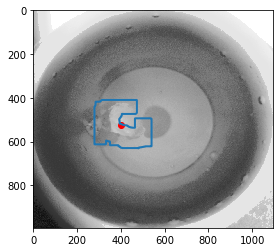

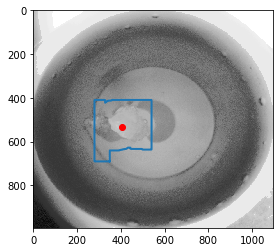

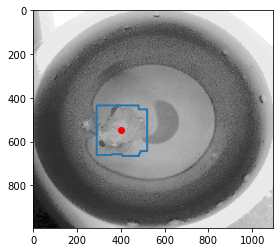

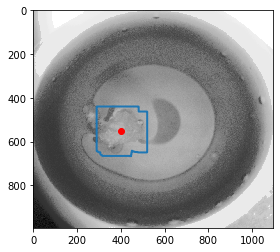

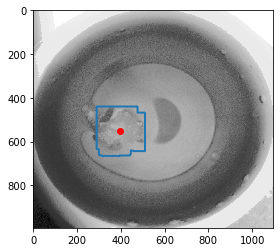

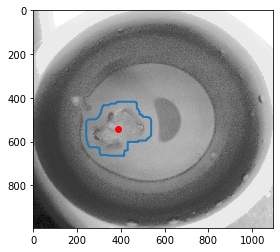

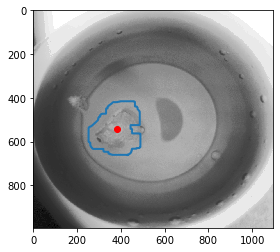

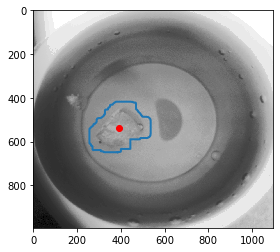

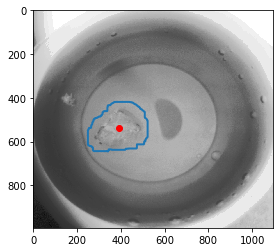

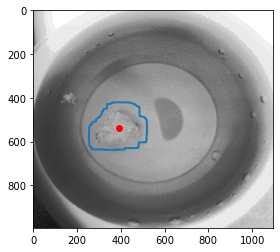

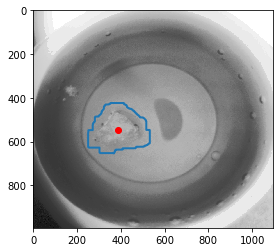

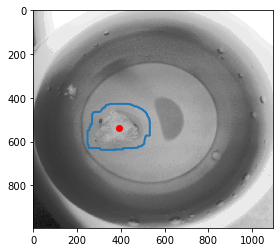

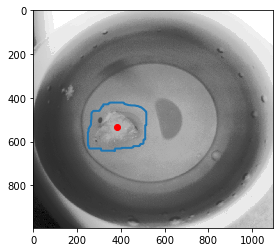

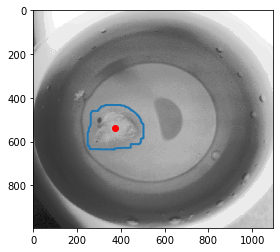

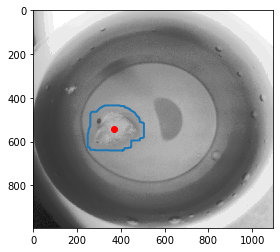

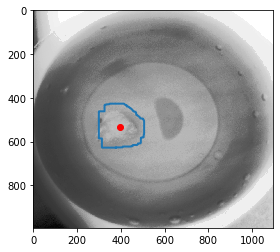

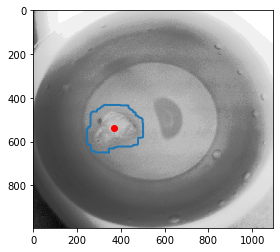

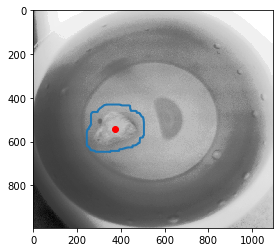

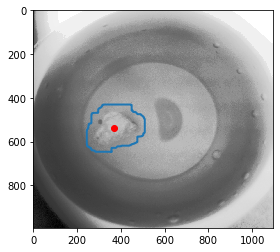

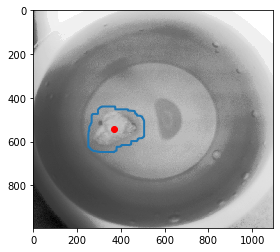

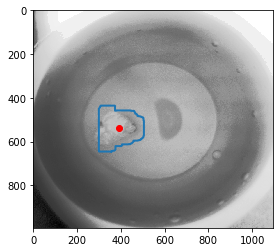

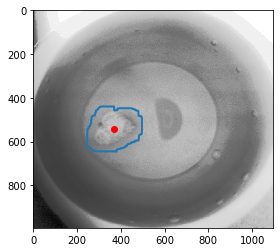

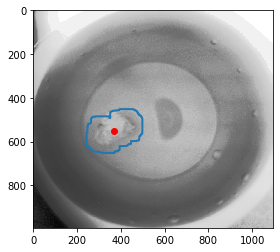

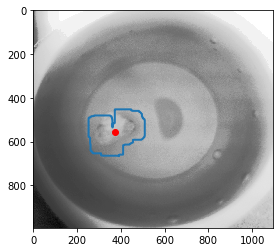

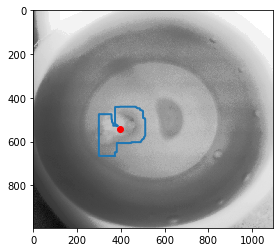

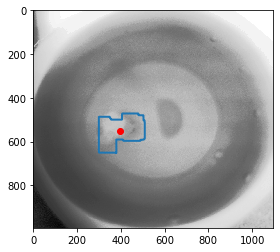

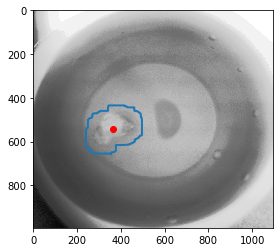

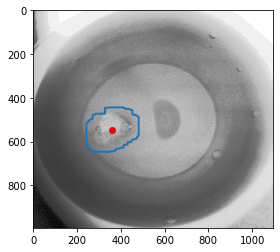

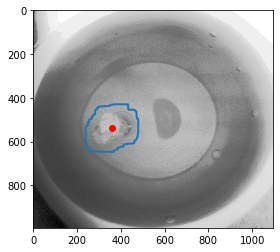

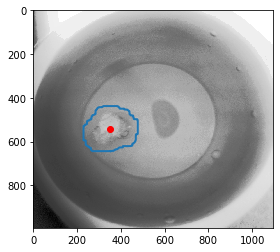

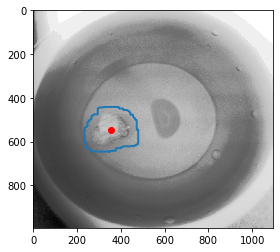

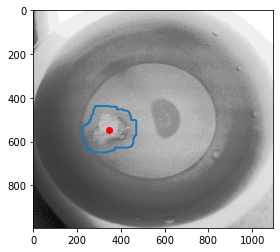

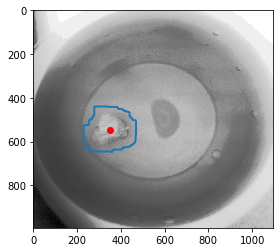

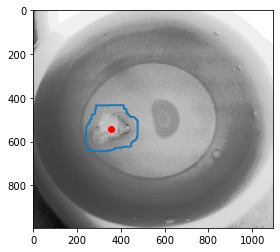

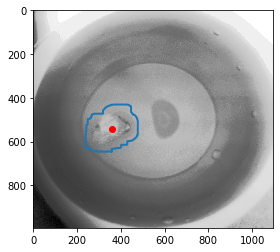

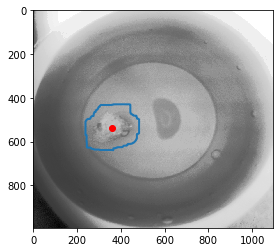

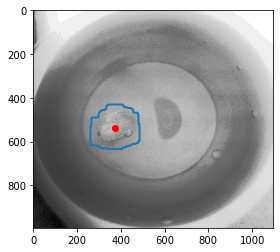

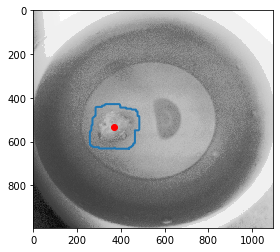

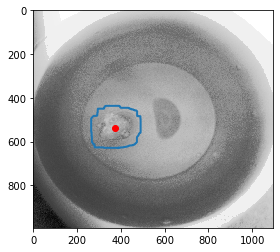

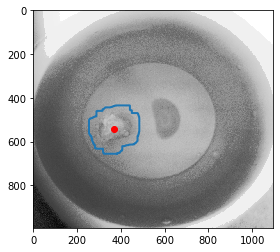

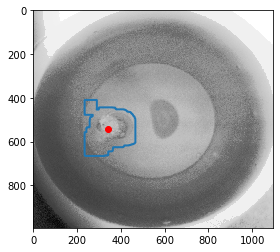

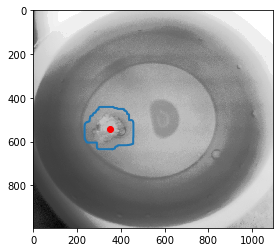

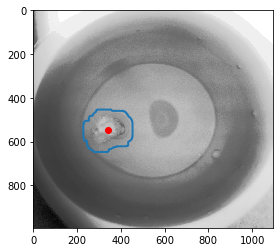

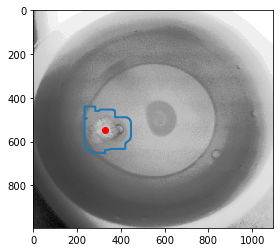

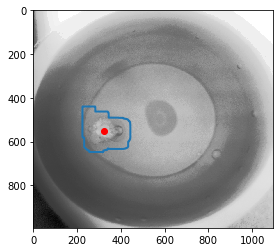

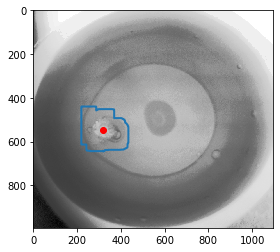

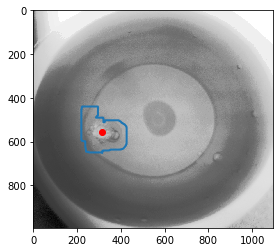

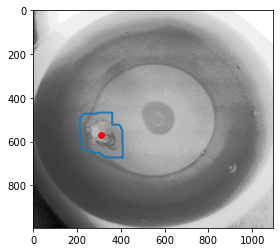

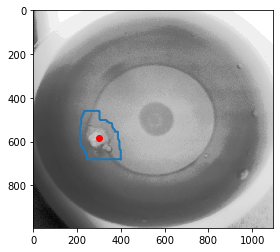

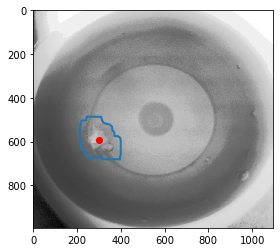

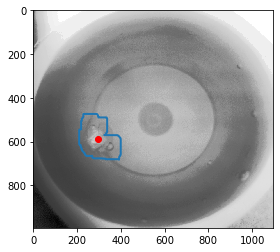

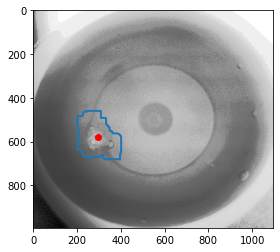

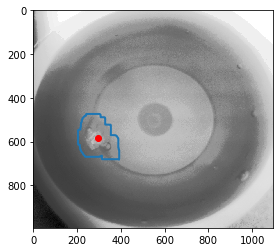

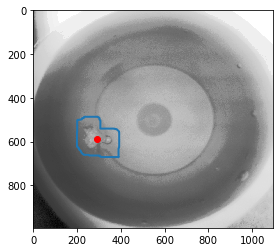

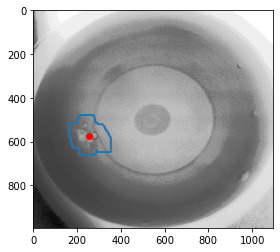

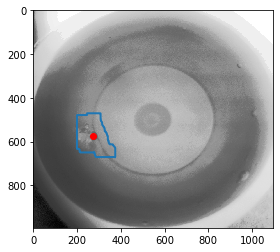

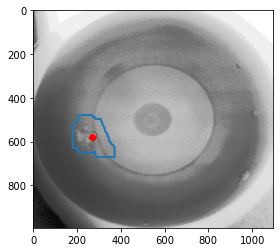

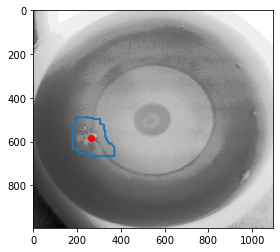

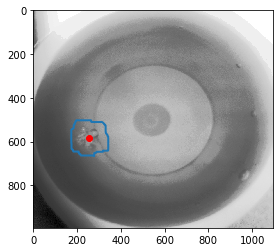

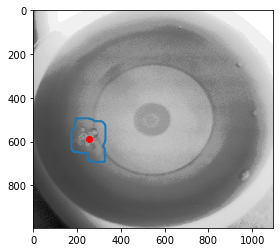

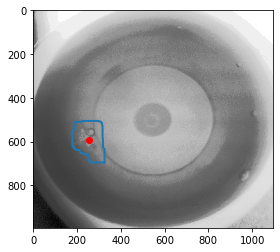

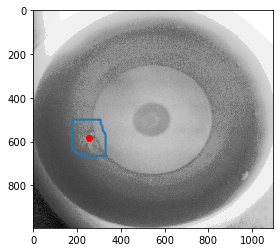

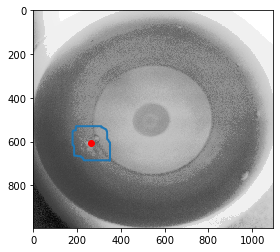

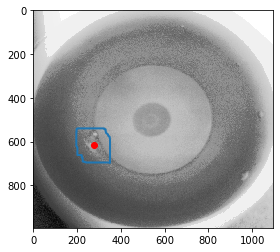

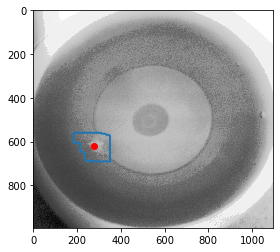

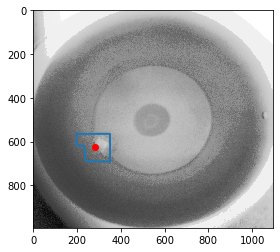

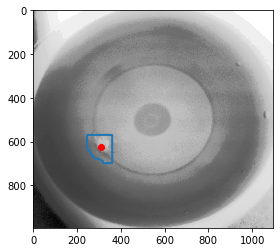

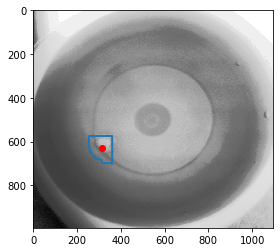

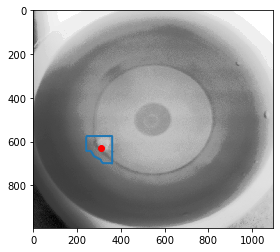

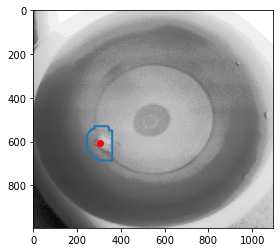

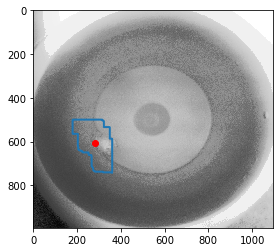

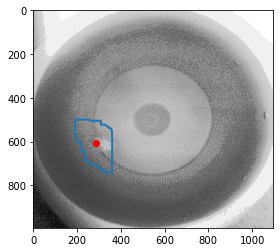

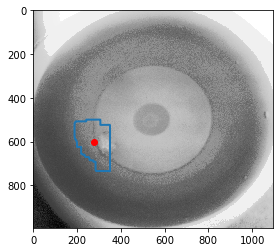

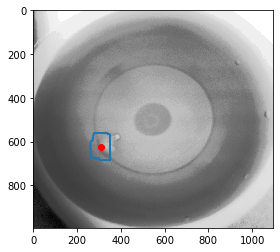

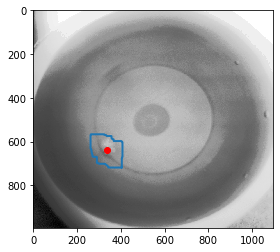

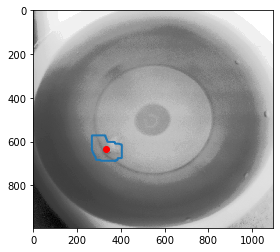

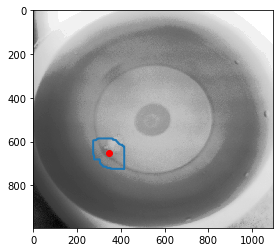

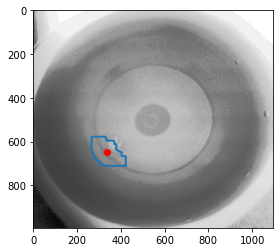

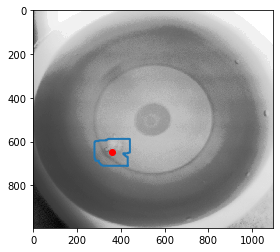

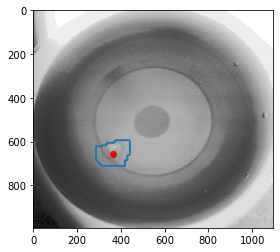

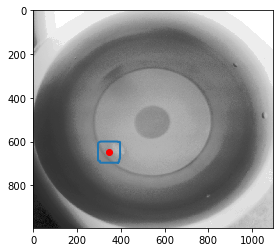

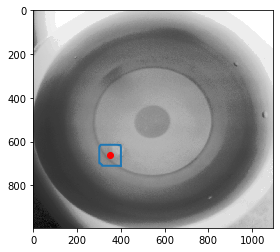

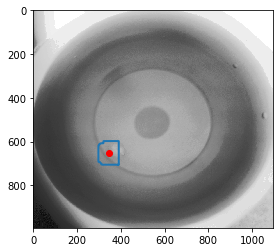

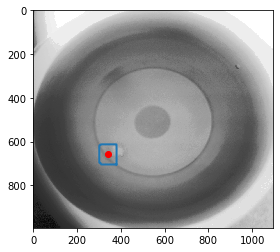

In [31]:
import math
path = []
dList = []
cList = []
rList = []
flag = True
for oneImage in os.listdir():

    if oneImage == '0581.bmp':
        flag = False
    image = cv2.imread(oneImage,0)
    imageOrigin = cv2.imread('../Antij_source_result/'+oneImage,0)
    tmp = np.ndarray(shape=np.shape(imageOrigin))
    tmp[270:750,130:600] = image
    
    cv2.imwrite('../BinaryResultBack/'+oneImage,tmp)
    contours =  measure.find_contours(tmp,0.5)
    
    if flag:
        plt.figure()
        for n, contour in enumerate(contours):
            plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
        
        tt = np.ndarray(shape=np.shape(tmp),dtype=np.int)
        tt[tmp==255] = 1
        prop = measure.regionprops(tt)
        d = 4*prop[0].area/prop[0].perimeter
        dList.append(d)
        cList.append(prop[0].perimeter)
        rList.append(math.sqrt(prop[0].area/math.pi))
        centroid_x, centroid_y = calCenter(tmp)
        path.append((centroid_x,centroid_y))
        plt.imshow(imageOrigin,cmap=plt.cm.gray)
        plt.scatter(centroid_x,centroid_y,color='red')
        plt.savefig('../Centroid/'+oneImage[:-4]+'.jpeg')
    

In [39]:
v = [cList[i]*2620*math.pi**2*abs(rList[i+1]-rList[i])*8/1095000 for i in range(len(rList)-1)]

In [42]:
import pandas as pd
v = pd.DataFrame(v)
v.to_excel('../v.xlsx')

In [3]:
# print(path)
path = [(399.0, 524.0), (404.0, 531.0), (402.0, 548.0), (402.0, 550.0), (396.0, 550.0), (385.0, 540.0), (380.0, 544.0), (392.0, 537.0), (390.0, 538.0), (389.0, 537.0), (388.0, 545.0), (390.0, 536.0), (383.0, 533.0), (371.0, 538.0), (369.0, 541.0), (396.0, 531.0), (368.0, 539.0), (372.0, 541.0), (370.0, 537.0), (370.0, 543.0), (389.0, 538.0), (367.0, 542.0), (369.0, 550.0), (375.0, 555.0), (398.0, 544.0), (396.0, 552.0), (364.0, 542.0), (359.0, 545.0), (358.0, 539.0), (352.0, 544.0), (355.0, 547.0), (346.0, 546.0), (349.0, 546.0), (354.0, 542.0), (357.0, 540.0), (358.0, 536.0), (374.0, 537.0), (369.0, 534.0), (375.0, 535.0), (370.0, 541.0), (340.0, 544.0), (348.0, 540.0), (340.0, 548.0), (329.0, 548.0), (324.0, 551.0), (319.0, 547.0), (312.0, 556.0), (310.0, 569.0), (299.0, 581.0), (301.0, 590.0), (297.0, 586.0), (293.0, 579.0), (293.0, 585.0), (291.0, 586.0), (256.0, 574.0), (274.0, 576.0), (267.0, 579.0), (264.0, 583.0), (255.0, 582.0), (256.0, 587.0), (256.0, 593.0), (253.0, 582.0), (265.0, 607.0), (275.0, 616.0), (278.0, 619.0), (283.0, 622.0), (308.0, 626.0), (312.0, 629.0), (308.0, 627.0), (306.0, 607.0), (282.0, 606.0), (285.0, 606.0), (279.0, 603.0), (308.0, 622.0), (336.0, 640.0), (330.0, 634.0), (347.0, 653.0), (336.0, 649.0), (360.0, 647.0), (366.0, 654.0), (346.0, 647.0), (351.0, 662.0), (345.0, 652.0), (341.0, 658.0)]

In [4]:
# print(dList)
dList = [149.74579734374754, 225.935307758189, 221.7779253372143, 217.07923183016754, 211.54094245705696, 207.62847642702215, 182.28457321091784, 194.68670752727365, 213.39694621949147, 206.1925184592729, 200.0095037498499, 218.65916161117713, 217.13655562371414, 205.36641521449113, 201.989929579742, 182.14852847677136, 200.72888632072798, 210.10431821609419, 201.5221348927961, 192.14245196055845, 171.27369996488815, 196.09869229718882, 181.8241182551827, 166.8446587575671, 143.88017764431729, 137.27570596033138, 198.53334624581652, 190.19033757191838, 201.37972857435082, 196.41007385813472, 195.5040997954988, 192.59821339931085, 195.01849285987893, 196.27158647743155, 192.5380000537587, 199.70826104710736, 191.07622070445248, 190.0972228356896, 193.0669155910043, 189.83959822858264, 174.87534438571555, 179.51419682807958, 187.80997866601157, 172.54883379068204, 175.1326257278569, 182.49090218892707, 156.45509580559428, 175.99033683265336, 167.4579724984898, 162.88336958536428, 152.82764322465627, 164.79225607124448, 158.39443909847392, 160.26248262349282, 147.47986963212782, 143.30323217345347, 148.08868834849196, 147.01522300539108, 149.47201774734972, 148.99704001744314, 141.54062354332683, 152.16766643572154, 153.12028151573364, 148.1345711986314, 124.06416972112363, 118.68957717448151, 108.29233238241972, 104.11339527956513, 104.91147376088641, 124.59745815313914, 152.22058942448885, 154.12046134259424, 149.65823805732643, 98.36275229118733, 125.76631545846276, 105.02409171343677, 125.21194080865831, 110.49292252466671, 122.64725765100974, 117.66928601914513, 99.67995705920168, 98.13157643636266, 98.69095549468146, 85.60924352675057]

In [3]:
import numpy as np
import tensorflow as tf
import math

In [4]:
x = [item[0] for item in path[:-2]]
y = [item[1] for item in path[:-2]]

x_data = np.array(x)[:, np.newaxis]
y_data = np.array(y)[:, np.newaxis]

dx = [path[i+1][0]-path[i][0] for i in range(len(path)-1)]
dy = [path[i+1][1]-path[i][1] for i in range(len(path)-1)]

u_x = np.array(dx[:-1])[:, np.newaxis]
u_y = np.array(dy[:-1])[:, np.newaxis]

d = np.array(dList[:-2])[:, np.newaxis]

In [7]:
print(u_x[0])
print(u_y[0])

[5.]
[7.]


In [9]:
flag = 1
if flag==1:
    ddtmp = [dx[i+1]-dx[i] for i in range(len(path)-2)]
else:
    ddtmp = [dy[i+1]-dy[i] for i in range(len(path)-2)]
dudt = np.array(ddtmp)[:, np.newaxis]

In [10]:
print(*map(len,(x_data,y_data,u_x,u_y,d,dudt)))
print(*map(np.shape,(x_data,y_data,u_x,u_y,d,dudt)))
print(len(path))

82 82 82 82 82 82
(82, 1) (82, 1) (82, 1) (82, 1) (82, 1) (82, 1)
84


In [11]:
with tf.Session() as sess:
    # add one more lKayer and return the output of this layer
    in_size = len(path)-2
    out_size = 1
    mu = 15
    rho_flow = 180
    rho = 2650
    g = 9.8
    k_out = 0.0
    psi_out = 0.0

    u_x_out = np.zeros([in_size, out_size], dtype=np.float32)
    u_y_out = np.zeros([in_size, out_size], dtype=np.float32)
    x_out = np.zeros([in_size, out_size], dtype=np.float32)
    y_out = np.zeros([in_size, out_size], dtype=np.float32)

    K = tf.Variable(tf.random_normal([1, 1], 10))
    psi = tf.Variable(tf.random_normal([1, 1], 10))
    Cd = tf.Variable(tf.random_normal([in_size, out_size], 0, 10))
    Fdz = tf.Variable(tf.random_normal([in_size, out_size], 0, 10))
    FinDivdudt = tf.Variable(tf.random_normal([in_size, out_size], 0, 10))
    dudt_out = tf.Variable(tf.random_normal([in_size, out_size], 0, 10))
    outputs = tf.Variable(tf.random_normal([in_size, out_size], 0, 10))
    l1 = tf.Variable(tf.random_normal([in_size, out_size], 0, 10))
    # 添加神经网络层的函数

    def add_layer(x, y, u_x, u_y, x_y_flag, d, activation_function=None):
        if(x_y_flag == 0):
            u = u_x
        else:
            u = u_y
        Re = rho_flow * K * u * d / mu
        # Cd = 24/Re*(1+8.1716*tf.exp(-4.0655*psi)*tf.pow(Re,0.0964+0.5565*psi))+73.69*tf.exp(-5.0748*psi)*Re/(Re+5.378*tf.exp(6.2122*psi))
        # Cd = 24*mu/(rho_flow*K*d)*(1/u+tf.exp(2.3288-6.5481*psi+2.4486*psi*psi))*tf.pow(rho_flow*K*u*d/mu,0.0964+0.5565*psi)/u + tf.exp(4.905-13.8944*psi+18.42222*psi*psi-10.2599*psi*psi*psi)/(1+mu/(rho_flow*K*d*u)*tf.exp(1.4681+12.2584*psi-20.7322*psi*psi+15.8855*psi*psi*psi))
        Cd = psi*24/Re*(1+3/16*Re)
        tf.print(Cd, [Cd], "Cd:")
        Fdz = math.pi*tf.pow(d, 2)/8*Cd*rho_flow*tf.pow(K-1, 2)*tf.pow(u, 2)
        tf.print(Fdz, [Fdz], "fdz:")
        # Fin = 1/6*math.pi*tf.pow(d,3)*rho*g*u/tf.pow((tf.pow(u_x,2)+tf.pow(u_y,2)),1/2)
        FinDivdudt = 1/6*math.pi*tf.pow(d, 3)*rho*g
        tf.print(FinDivdudt, [FinDivdudt], "FinDivdudt:")
        dudt_out = Fdz/((math.pi*tf.pow(d, 3))/6 *
                        (rho-1/2*rho_flow*(K-1))+FinDivdudt)
        if activation_function is None:
            outputs = dudt_out
        else:
            outputs = activation_function(dudt_out)
        return outputs

    # 不同时间质心序列的位置、dudt的placeholder
    x_ph = tf.placeholder(tf.float32, [None, 1])
    y_ph = tf.placeholder(tf.float32, [None, 1])
    u_x_ph = tf.placeholder(tf.float32, [None, 1])
    u_y_ph = tf.placeholder(tf.float32, [None, 1])
    d_ph = tf.placeholder(tf.float32, [None, 1])
    dudt_ph = tf.placeholder(tf.float32, [None, 1])

    l1 = add_layer(x_ph, y_ph, u_x_ph, u_y_ph, 0, d_ph)
    loss = tf.reduce_mean(tf.square(outputs-dudt))
    train_step = tf.train.GradientDescentOptimizer(0.8).minimize(loss)

    # 变量初始化，目的是给Graph上的图中的变量初始化。
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        sess.run(train_step, feed_dict={
                 x_ph: x_data, y_ph: y_data, u_x_ph: u_x, u_y_ph: u_y, d_ph: d})
        if(i % 100 == 0):
            print("loss", sess.run(loss, feed_dict={
                  x_ph: x_data, y_ph: y_data, u_x_ph: u_x, u_y_ph: u_y, d_ph: d}))
    k_out = K.eval(session=sess)
    psi_out = psi.eval(session=sess)


Fdz = np.zeros([in_size, out_size], dtype=np.float32)
FinDivdudt = np.zeros([in_size, out_size], dtype=np.float32)
Cd = np.zeros([in_size, out_size], dtype=np.float32)
# 初始速度
u_x_0 = 5
u_y_0 = 7
# 初始位置，需要我们自己给出
x_0 = 399
y_0 = 524
u_x_out[0, 0] = u_x_0
x_out[0, 0] = x_0
# print("D:",D)
# print("res_part5:",res_part5)
ReDivu = rho_flow*k_out*d/mu
for i in range(in_size-1):
    # 工程近似公式
    # Cd[i,0] = 24/ReDivu[i,0]/u_x_out[i,0]*(1+8.1716*np.exp(-4.0655*psi_out[i,0])*np.power(ReDivu[i,0]*u_x_out[i,0],0.0964+0.5565*psi_out[i,0]))+73.69*np.exp(-5.0748*psi_out[i,0])*ReDivu[i,0]*u_x_out[i,0]/(ReDivu[i,0]*u_x_out[i,0]*u_x_out[i,0]+5.378*np.exp(6.2122*psi_out[i,0]))
    Cd[i, 0] = psi_out*24/ReDivu[i, 0]/u_x_out[i, 0] * \
        (1+3/16*ReDivu[i, 0]*u_x_out[i, 0])
    Fdz[i, 0] = math.pi*np.power(d[i, 0], 2)/8*Cd[i, 0] * \
        rho_flow*np.power(k_out-1, 2)*np.power(u_x_out[i, 0], 2)
    FinDivdudt[i, 0] = 1/6*math.pi*np.power(d[i, 0], 3)*rho*g
    u_x_out[i+1, 0] = Fdz[i, 0]/(math.pi*np.power(d[i, 0], 3))/6*(
        rho-1/2*rho_flow*(k_out-1)*(k_out-1)+FinDivdudt[i, 0]) + u_x_out[i, 0]
    x_out[i+1, 0] = x_out[i, 0] + u_x_out[i, 0]
# for i in range(in_size-1):
#   u_x_out[i+1,0] = u_x_out[i,0]+res_part1[i,0]*u_x_out[i,0]+res_part2[i,0]*np.power(u_x_out[i,0],B[i,0]+1)+res_part3[i,0]*u_x_out[i,0]*u_x_out[i,0]*u_x_out[i,0]/(res_part4*u_x_out[i,0]+res_part5[i,0])
#   x_out[i+1,0] = np.sum(u_x_out[:i+1]) + x_0
print("cd", Cd)
print("Fdz:", Fdz)
print("psi:", psi_out)
print("k_out:", k_out)
print("u_x:", u_x_out)
print("x:", x_out)

loss 434.1754
loss 8.43538
loss 0.16388723
loss 0.003184121
loss 6.185544e-05
loss 1.2014823e-06
loss 2.3906507e-08
loss 1.6559822e-09
loss 1.6144058e-09
loss 1.6143467e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.6143454e-09
loss 1.614

C:\Users\Kfor\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in multiply
C:\Users\Kfor\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in multiply


AttributeError: 'list' object has no attribute 'shape'

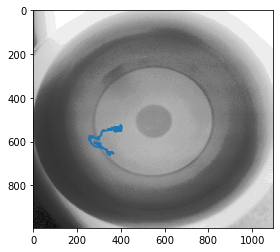

In [14]:
image = plt.imread('../Antij_source_result/0606.bmp')

contour = np.array(path)
plt.figure()
plt.imshow(image,cmap=plt.cm.gray)
plt.plot(contour[:, 0], contour[:, 1], linewidth=2)

In [24]:
x = [path[i][0] for i in range(len(path))]
y = [path[i][1] for i in range(len(path))]

In [25]:
z = [i for i in range(len(x))]

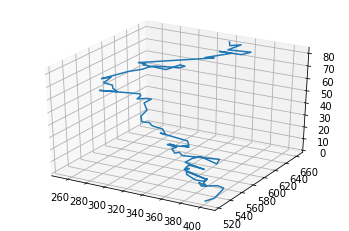

In [27]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
 
mpl.rcParams['legend.fontsize'] = 10
 
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z, label='parametric curve')
 
plt.show()